<a href="https://colab.research.google.com/github/RavindrapalRathore/Task7/blob/main/Task_7_Assignment16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

**Importing the dataset**

In [3]:
df=pd.read_csv("/content/drive/MyDrive/dataset/task7/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.drop('User ID', axis=1, inplace =True)
df["Gender"]=df["Gender"].replace({"Male":0,"Female":1})

**Splitting the dataset into the Training set and Test set**

In [6]:
X=df.iloc[:,:3].values
y=df.iloc[:,3].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

**Feature Scaling**

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**Fitting Random Forest to the Training set**

**Predicting the Test set results**

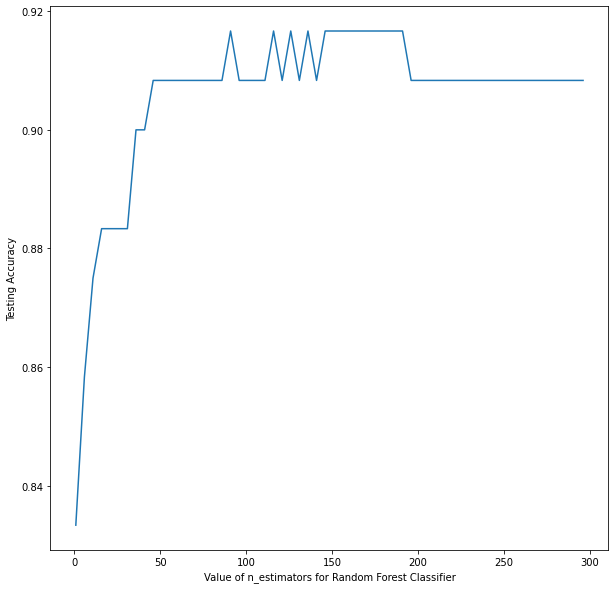

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
scores =[]
for k in range(1, 300,5):
    rfc = RandomForestClassifier(n_estimators=k,random_state=0,criterion="entropy")
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.figure(figsize=(10,10))
plt.plot(range(1, 300,5), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

data = pd.DataFrame({"k_value":range(1, 300,5),"Accuracy":scores})

In [9]:
data=data.sort_values(by=["Accuracy"],ascending=False)
data

,k_value,Accuracy
30,151,0.916667
34,171,0.916667
32,161,0.916667
31,156,0.916667
35,176,0.916667
29,146,0.916667
36,181,0.916667
27,136,0.916667
37,186,0.916667
25,126,0.916667


In [10]:
model  = RandomForestClassifier(random_state =0,n_estimators=151,criterion="entropy")
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=151, random_state=0)

In [11]:
y_pred = model.predict(X_test)
#To get the parameters of the models 
#n_estimators : no of trees you want to build in the random forest model
for k,v in model.get_params().items():
  print(k,":",v)

bootstrap : True
ccp_alpha : 0.0
class_weight : None
criterion : entropy
max_depth : None
max_features : auto
max_leaf_nodes : None
max_samples : None
min_impurity_decrease : 0.0
min_samples_leaf : 1
min_samples_split : 2
min_weight_fraction_leaf : 0.0
n_estimators : 151
n_jobs : None
oob_score : False
random_state : 0
verbose : 0
warm_start : False


In [12]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with 199 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 199 decision-trees : 0.9167


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

#using feature importance variable to see feature importance 
X_train=pd.DataFrame(X_train ,columns=df.columns[:-1])
X_train
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [14]:
feature_scores

Age                0.494532
EstimatedSalary    0.492694
Gender             0.012775
dtype: float64

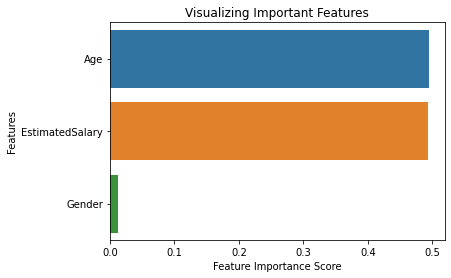

In [15]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

In [16]:
X=df[["Age","EstimatedSalary"]]
y=df["Purchased"]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


model  = RandomForestClassifier(random_state =0,n_estimators=151,criterion="entropy")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print('Model accuracy score with 151 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 151 decision-trees : 0.9250


**Making the Confusion Matrix**

In [18]:
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[74  5]
 [ 4 37]]


In [19]:
#Classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        79
           1       0.88      0.90      0.89        41

    accuracy                           0.93       120
   macro avg       0.91      0.92      0.92       120
weighted avg       0.93      0.93      0.93       120

